In [1]:
# This notebook is optimized to run on a gpu instance of Amazon Sagemaker.

In [2]:
# imports

# All of these modules are either included in the code base
# or provided by default on Amazon Sagemaker. 

import gc
import glob
import json
import math
import os
import pickle
import pprint
import random
import time
from collections import Counter
from pathlib import Path
from time import gmtime, strftime

In [3]:
import sys

sys.path.append('..')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from src.db import NABat_DB
from PIL import Image
from tensorflow import keras
from keras import layers
from keras.callbacks import (EarlyStopping, ModelCheckpoint,
                                        ReduceLROnPlateau)
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model


In [5]:
import src.db_handler as db_handler
import src.dataset_generator as ds
import src.nabat_detector as nb

In [6]:
sample_classes = ds.get_sample_classes('../../Downloads/data/wav')

In [7]:
# Test the image generator function.
gen_validate = ds.test_generator('test')

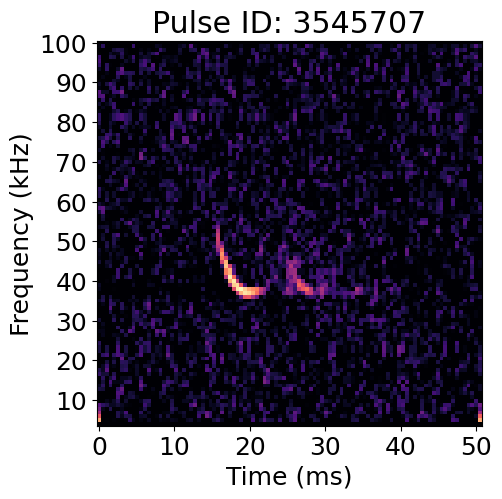

In [8]:
pulse = next(gen_validate)
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(5, 5))
plt.title(f'Pulse ID: {pulse[1]}')
plt.imshow(pulse[0]['input_1'])
plt.xticks(np.linspace(0, 98, 6), np.linspace(0, 50, 6).astype('int'))
plt.yticks(np.linspace(0, 98, 20)[::2], np.linspace(100, 5, 20).astype('int')[::2])
plt.ylabel('Frequency (kHz)')
plt.xlabel("Time (ms)")
plt.show()

In [6]:
nb.save_model_data_splits('../../Downloads/data/wav')

,Pulses for validation,Pulses for testing,Pulses for training,Pulse counts,File counts
Species,,,,,
LABO,3766,3747,30101,39496,1124
NYFE,0,0,0,146,11
TABR,2032,1802,14777,18611,1025
MYAU,748,381,4783,5912,80
MYYU,3130,2844,25024,30998,939
COTO,909,597,4102,5608,186
MYSO,2694,2813,22786,28383,595
PESU,3787,3680,29191,36658,948
MYVE,0,0,0,2977,40


In [ ]:
nb.train_model_round1('../../Downloads/data/wav', "3")

In [9]:
nb.train_model_round2('../../Downloads/data/wav', "2")

2.10.0
Number of GPUs Available:  0
Epoch 1/5


2023-08-13 20:28:44.914921: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16697/16697 [==============================] - 5948s 356ms/step - loss: 1.7256 - accuracy: 0.4934 - val_loss: 2.3072 - val_accuracy: 0.3401
Epoch 2/5
16697/16697 [==============================] - 6181s 370ms/step - loss: 1.5721 - accuracy: 0.5541 - val_loss: 2.4426 - val_accuracy: 0.3298
Epoch 3/5
16697/16697 [==============================] - 7589s 454ms/step - loss: 1.4519 - accuracy: 0.5953 - val_loss: 2.6152 - val_accuracy: 0.3141
Epoch 3: early stopping


INFO:tensorflow:Assets written to: /Users/adityakrishna/nabat_ml_fork/src/../models/m-2/assets


INFO:tensorflow:Assets written to: /Users/adityakrishna/nabat_ml_fork/src/../models/m-2/assets


In [ ]:
nb.train_model_round2('../../Downloads/data/wav', "3")

0
1
2
3


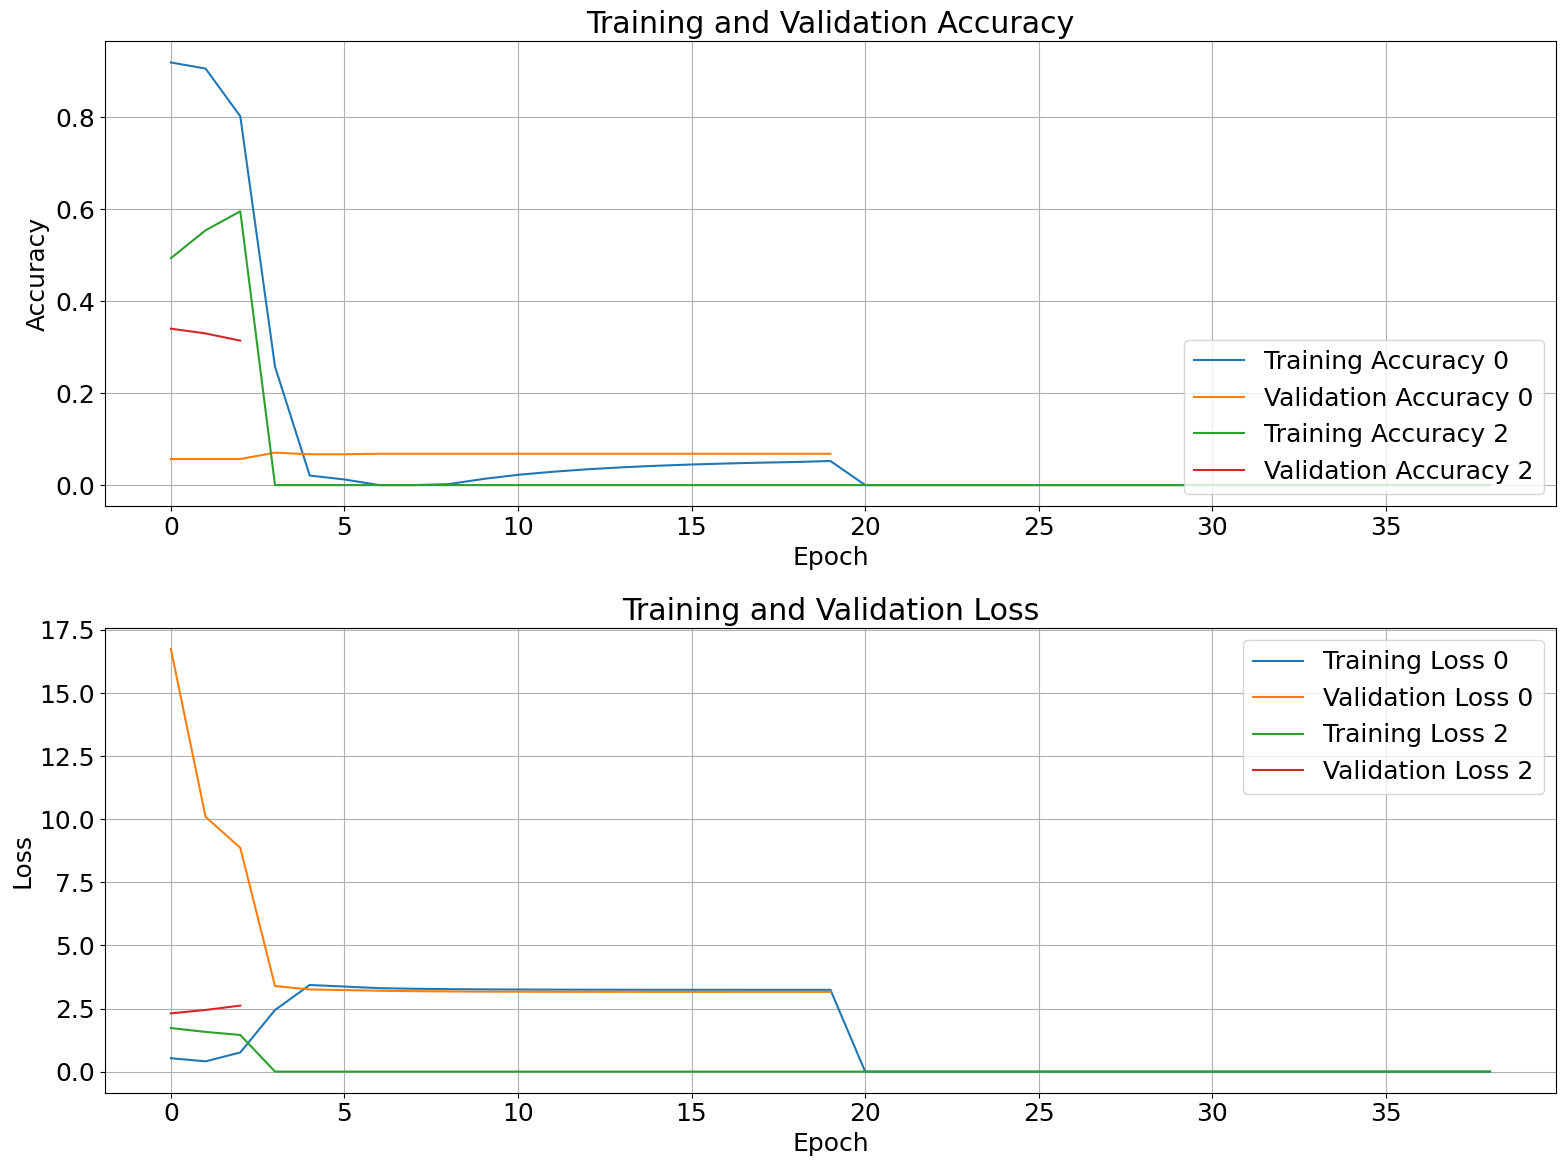

In [10]:
nb.plot_training()

In [10]:
ds.initialize_available_classes(ds.get_sample_classes('../../Downloads/data/wav'))

['ANPA',
 'COTO',
 'EPFU',
 'EUPE',
 'IDPH',
 'LABL',
 'LABO',
 'LACI',
 'LAIN',
 'LANO',
 'LASE',
 'MYAU',
 'MYCA',
 'MYCI',
 'MYEV',
 'MYGR',
 'MYLE',
 'MYLU',
 'MYSE',
 'MYSO',
 'MYTH',
 'MYVO',
 'MYYU',
 'NOISE',
 'NYHU',
 'NYMA',
 'PAHE',
 'PESU',
 'TABR']


['ANPA',
 'COTO',
 'EPFU',
 'EUPE',
 'IDPH',
 'LABL',
 'LABO',
 'LACI',
 'LAIN',
 'LANO',
 'LASE',
 'MYAU',
 'MYCA',
 'MYCI',
 'MYEV',
 'MYGR',
 'MYLE',
 'MYLU',
 'MYSE',
 'MYSO',
 'MYTH',
 'MYVO',
 'MYYU',
 'NOISE',
 'NYHU',
 'NYMA',
 'PAHE',
 'PESU',
 'TABR']

In [11]:
nb.run_predictions_on_provided_data('../../Downloads/data/wav', "0")

1/1 [==============================] - 8s 8s/step
1024
1/1 [==============================] - 7s 7s/step
2048
1/1 [==============================] - 7s 7s/step
3072
1/1 [==============================] - 7s 7s/step
4096
1/1 [==============================] - 7s 7s/step
5120
1/1 [==============================] - 7s 7s/step
6144
1/1 [==============================] - 7s 7s/step
7168
1/1 [==============================] - 7s 7s/step
8192
1/1 [==============================] - 7s 7s/step
9216
1/1 [==============================] - 8s 8s/step
10240
1/1 [==============================] - 7s 7s/step
11264
1/1 [==============================] - 7s 7s/step
12288
1/1 [==============================] - 7s 7s/step
13312
1/1 [==============================] - 8s 8s/step
14336
1/1 [==============================] - 7s 7s/step
15360
1/1 [==============================] - 6s 6s/step
16384
1/1 [==============================] - 6s 6s/step
17408
1/1 [==============================] - 6s 6s/step
18432
1